In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [27]:
import os

os.chdir("D:/number_of_case_per_model")

In [28]:
#importing data

df_bin = pd.read_csv("cases_per_experiment_binomial.csv")

df_logit = pd.read_csv("cases_per_experiment_logit.csv")

df_seg = pd.read_csv("cases_per_experiment_segmented_2m.csv")

df_env = pd.read_csv("cases_per_experiment_enveloppe_2m.csv")

df_ML = pd.read_csv("cases_per_experiment_logistic_ML.csv")

In [29]:
# combined_column = df_env['experiment'].astype(str) + "_" + df_env['duration'].astype(str)

# df_env.insert(0, 'Exp', combined_column)

# # Drop the original columns
# df_env.drop(['experiment', 'duration'], axis=1, inplace=True)


# df_bin.insert(0, 'Exp', combined_column)

# # Drop the original columns
# df_bin.drop(['experiment', 'duration'], axis=1, inplace=True)

# datacal = df_env[["Exp", "N", "positives"]]  
# datacal.columns = ["Exp", "N", "obs"]
# datacal.loc[:, 'sd'] = np.sqrt(datacal['obs'] * (datacal['N'] - datacal['obs']))
# datacal.head()

# y_pred_columns = [col for col in df_env.columns if 'prob' in col]
# df_env['Mean'] = df_env[y_pred_columns].mean(axis=1)

# y_pred_data = df_env[y_pred_columns].values

# # Calculer les quantiles pour chaque ligne
# quantiles = np.quantile(y_pred_data, q=[0.025, 0.25, 0.5, 0.75, 0.975], axis=1).astype(float)

# # Ajouter les quantiles comme nouvelles colonnes dans le DataFrame
# quantile_labels = ['CI_2.5', 'CI_25', 'Median', 'CI_75', 'CI_97.5']
# for i, label in enumerate(quantile_labels):
#     df_env[label] = quantiles[i]


# df_env.drop(y_pred_columns, axis=1, inplace=True)

# res = df_env

In [30]:
def combine_columns(df, col1, col2, new_col):
    combined_column = df[col1].astype(str) + "_" + df[col2].astype(str)
    df.insert(0, new_col, combined_column)
    df.drop([col1, col2], axis=1, inplace=True)
    return df

def calculate_sd(df, col1, col2, new_col):
    df.loc[:, new_col] = np.sqrt(df[col1] * (df[col2] - df[col1]))
    return df

def calculate_mean(df, col_pattern, new_col):
    col_list = [col for col in df.columns if col_pattern in col]
    df[new_col] = df[col_list].mean(axis=1)
    return df, col_list

def calculate_quantiles(df, data, quantiles, labels):
    quantile_values = np.quantile(data, q=quantiles, axis=1).astype(float)
    for i, label in enumerate(labels):
        df[label] = quantile_values[i]
    return df

# Use the functions to process your data
df_env = combine_columns(df_env, 'experiment', 'duration', 'Exp')
df_bin = combine_columns(df_bin, 'experiment', 'duration', 'Exp')
df_seg = combine_columns(df_seg, 'experiment', 'duration', 'Exp')
df_logit = combine_columns(df_logit, 'experiment', 'duration', 'Exp')
df_ML = combine_columns(df_ML, 'experiment', 'duration', 'Exp')

datacal = df_env[["Exp", "N", "positives"]]  
datacal.columns = ["Exp", "N", "obs"]
datacal = calculate_sd(datacal, 'obs', 'N', 'sd')

df_env, y_pred_columns_env = calculate_mean(df_env, 'prob', 'Mean')
y_pred_data_env = df_env[y_pred_columns_env].values


df_seg, y_pred_columns_seg = calculate_mean(df_seg, 'prob', 'Mean')
y_pred_data_seg = df_seg[y_pred_columns_seg].values


df_logit, y_pred_columns_logit = calculate_mean(df_logit, 'prob', 'Mean')
y_pred_data_logit = df_logit[y_pred_columns_logit].values

df_ML, y_pred_columns_ML = calculate_mean(df_ML, 'prob', 'Mean')
y_pred_data_ML = df_ML[y_pred_columns_ML].values

quantiles = [0.025, 0.25, 0.5, 0.75, 0.975]
quantile_labels = ['CI_2.5', 'CI_25', 'Median', 'CI_75', 'CI_97.5']
df_env = calculate_quantiles(df_env, y_pred_data_env, quantiles, quantile_labels)
df_seg = calculate_quantiles(df_seg, y_pred_data_seg, quantiles, quantile_labels)
df_logit = calculate_quantiles(df_logit, y_pred_data_logit, quantiles, quantile_labels)
df_ML = calculate_quantiles(df_ML, y_pred_data_ML, quantiles, quantile_labels)

df_env.drop(y_pred_columns_env, axis=1, inplace=True)
df_seg.drop(y_pred_columns_seg, axis=1, inplace=True)
df_logit.drop(y_pred_columns_logit, axis=1, inplace=True)
df_ML.drop(y_pred_columns_ML, axis=1, inplace=True)

C:\Users\U117-T408\AppData\Local\Temp\ipykernel_748\232405959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = np.sqrt(df[col1] * (df[col2] - df[col1]))


### Binomial VS ML logistic regression

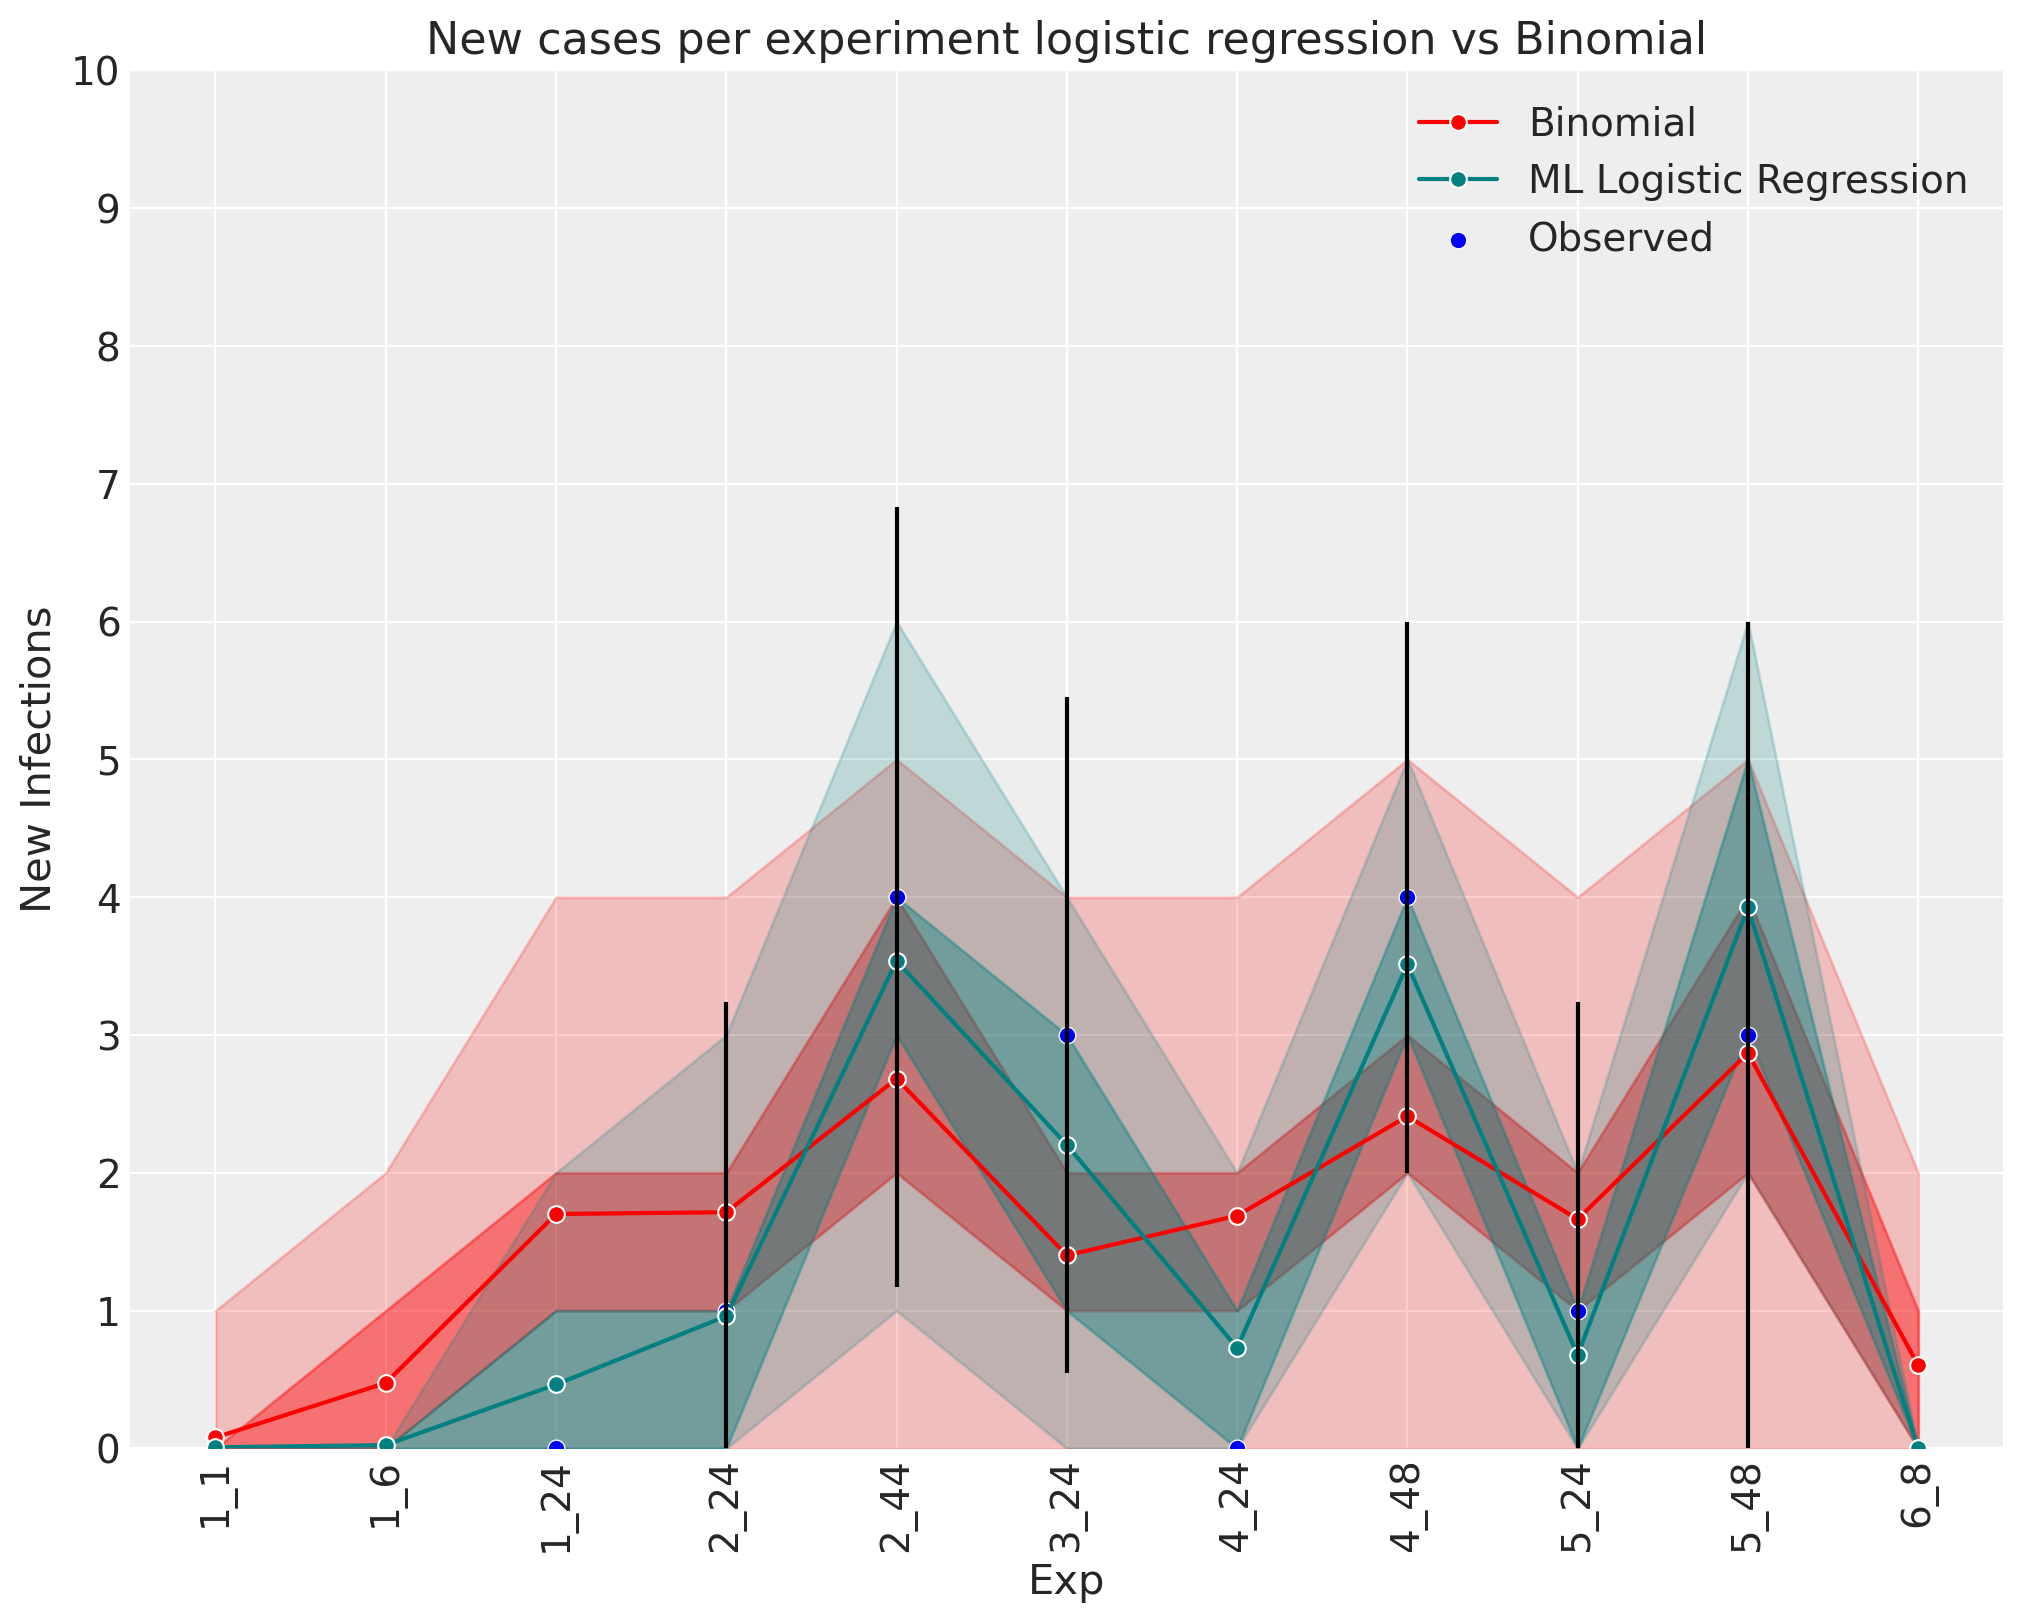

In [31]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_ML, x='Exp', y='Mean', color='teal', marker= 'o', label='ML Logistic Regression')
plt.fill_between(df_ML['Exp'], df_ML['CI_2.5'], df_ML['CI_97.5'], color='teal', alpha=0.2)
plt.fill_between(df_ML['Exp'], df_ML['CI_25'], df_ML['CI_75'], color='teal', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment logistic regression vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()

### Binomial VS Logistic

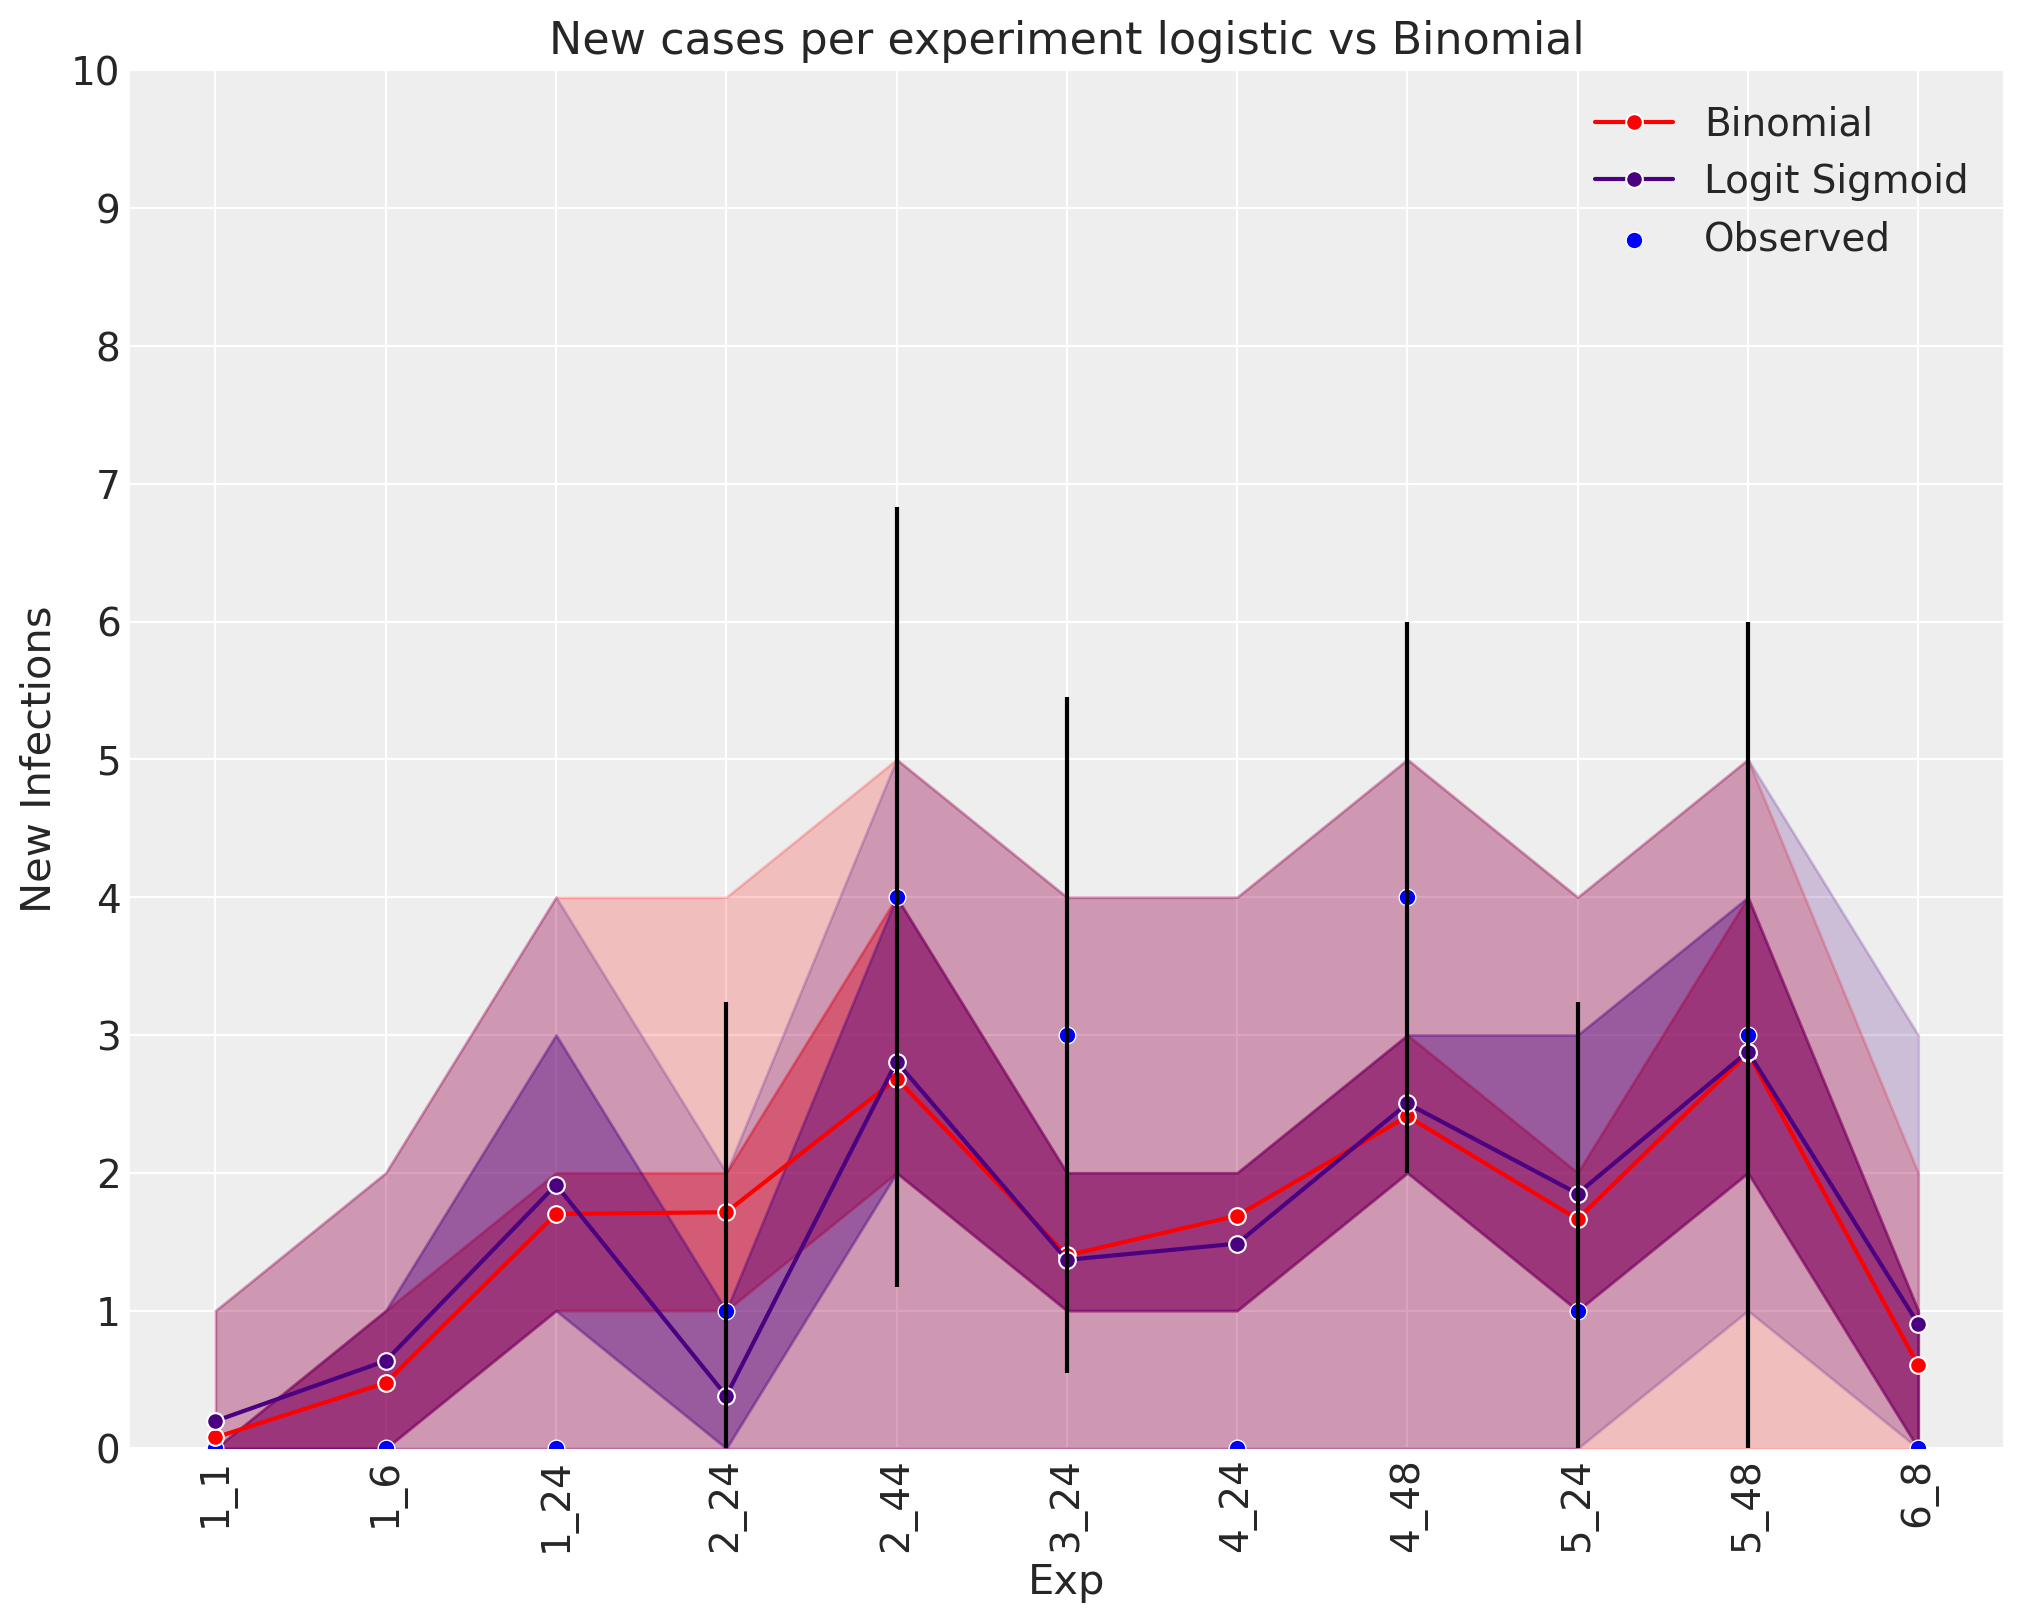

In [32]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_logit, x='Exp', y='Mean', color='indigo', marker= 'o', label='Logit Sigmoid')
plt.fill_between(df_logit['Exp'], df_logit['CI_2.5'], df_logit['CI_97.5'], color='indigo', alpha=0.2)
plt.fill_between(df_logit['Exp'], df_logit['CI_25'], df_logit['CI_75'], color='indigo', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment logistic vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()

## Binomial VS Envelope

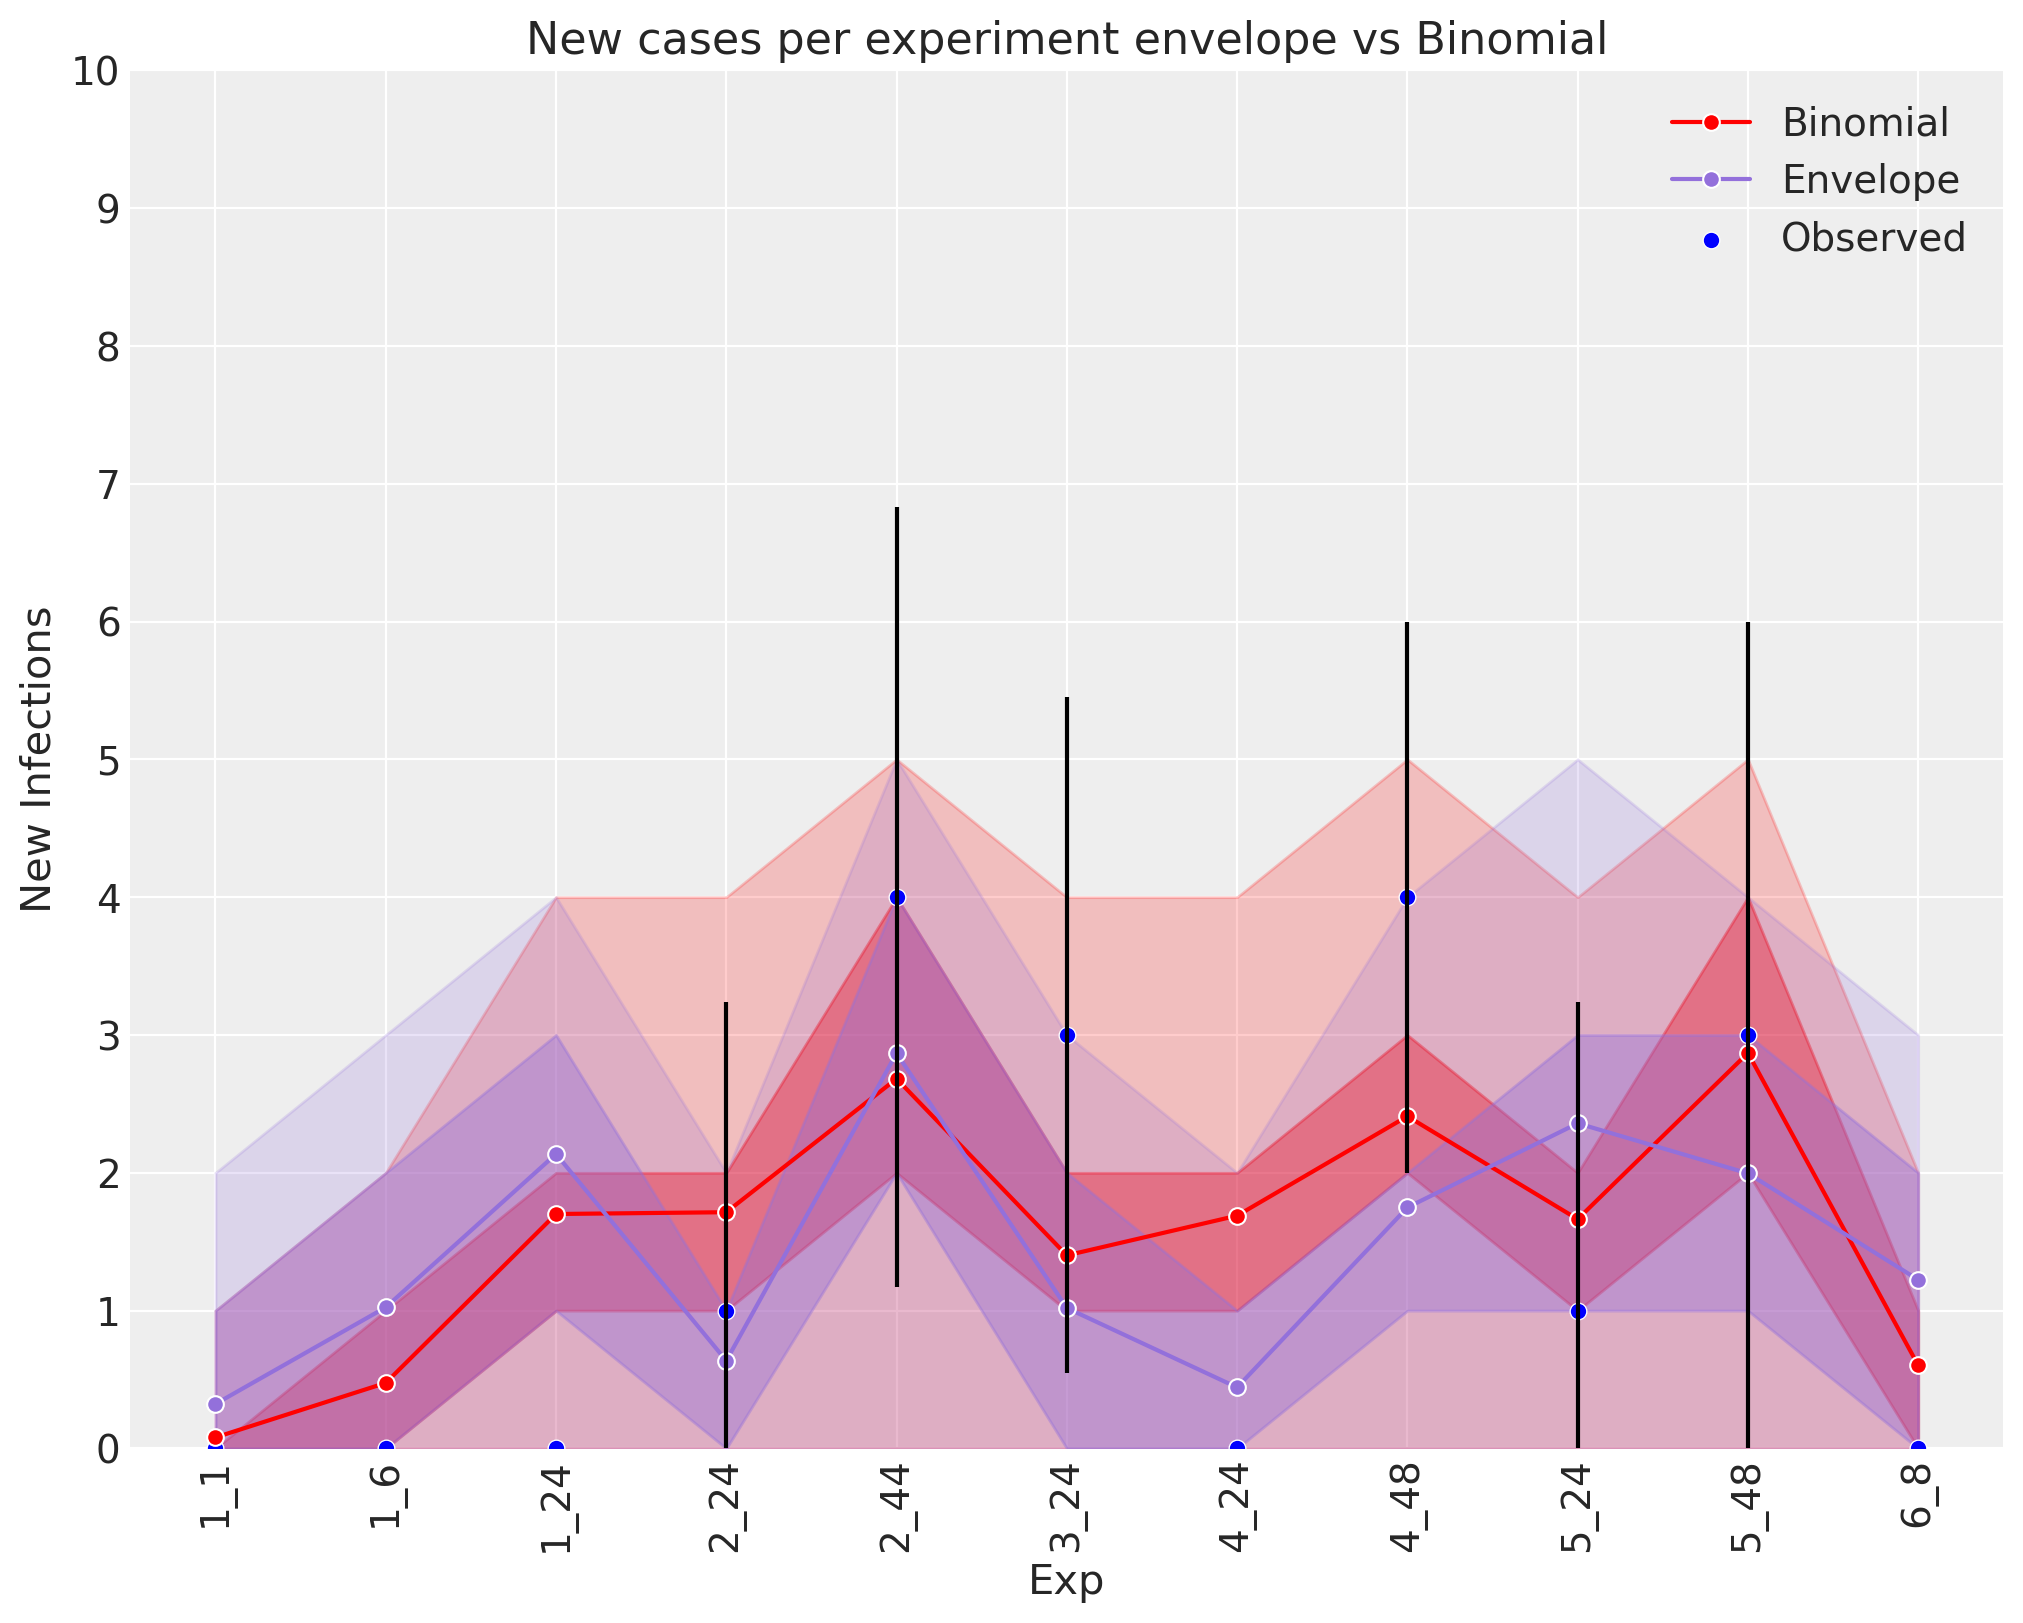

In [33]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.2)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.4)

# plotting results of envelope model in red
sns.lineplot(data=df_env, x='Exp', y='Mean', color='mediumpurple', marker= 'o', label='Envelope')
plt.fill_between(df_env['Exp'], df_env['CI_2.5'], df_env['CI_97.5'], color='mediumpurple', alpha=0.2)
plt.fill_between(df_env['Exp'], df_env['CI_25'], df_env['CI_75'], color='mediumpurple', alpha=0.4)


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment envelope vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()

## Binomial VS Segmented

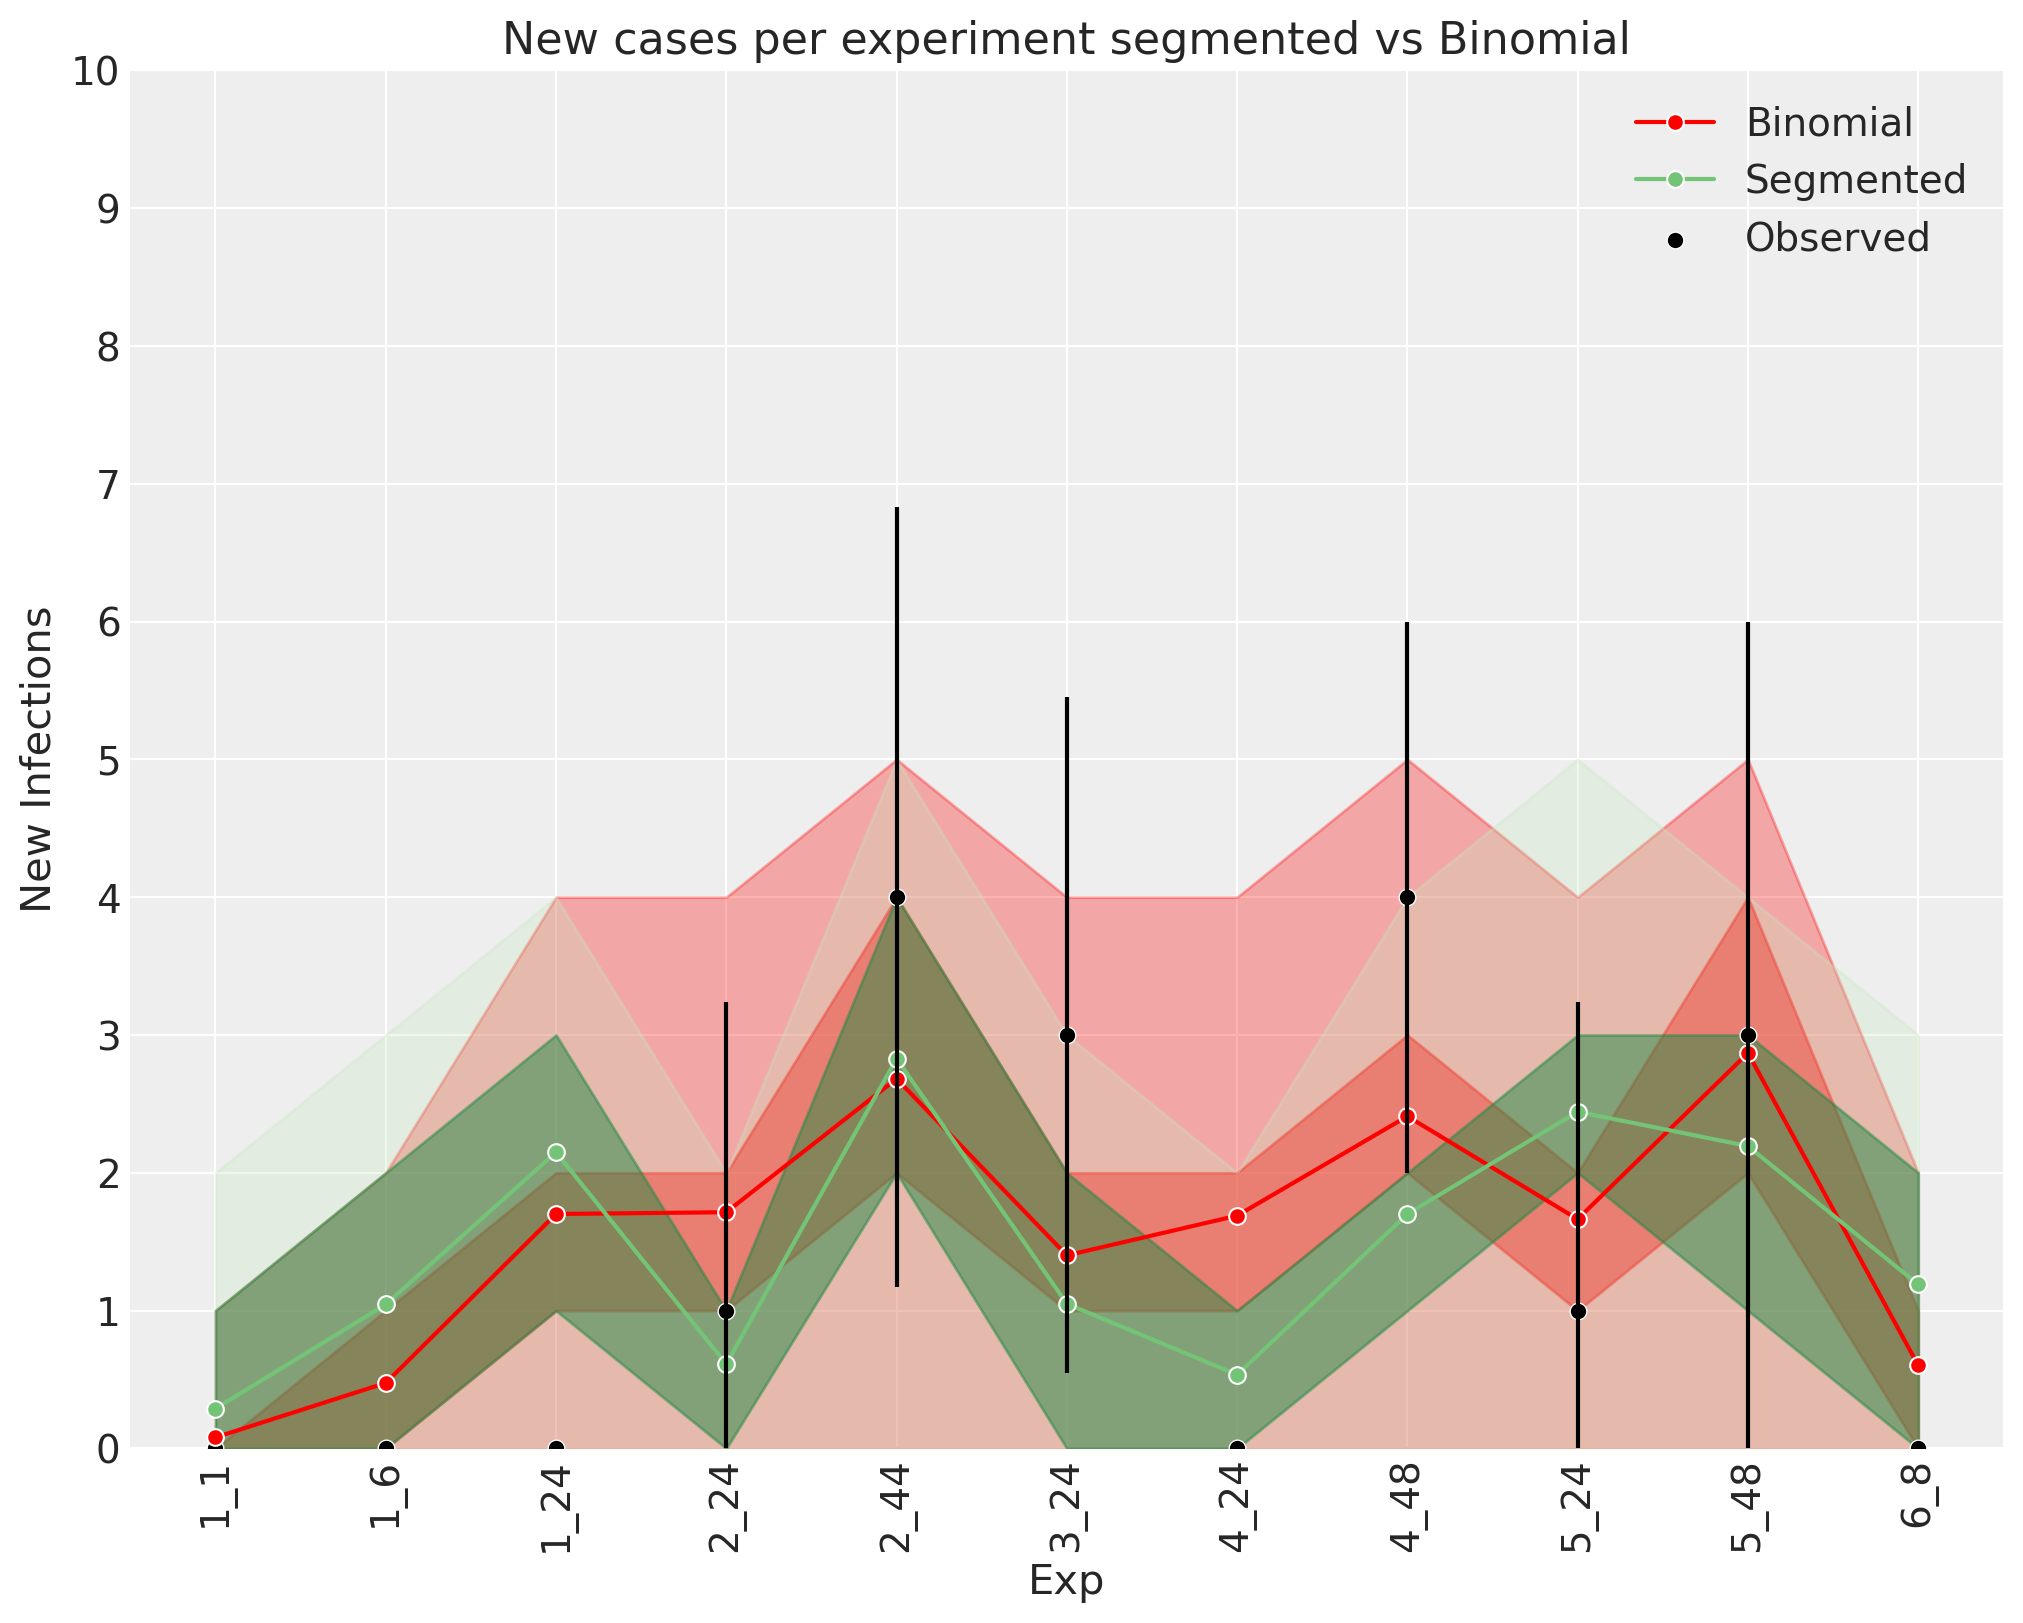

In [34]:
# Create two color palettes
palette_bin = sns.color_palette("Blues", 3)  # Generate 3 shades of blue
palette_seg = sns.color_palette("Greens", 3)  # Generate 3 shades of green

# Plotting the main line and points
plt.figure(figsize=(10, 8))

# plotting results of binomial model in shades of blue
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker='o', label='Binomial', alpha=1)
plt.fill_between(df_bin['Exp'], df_bin['CI_2.5'], df_bin['CI_97.5'], color='r', alpha=0.3)
plt.fill_between(df_bin['Exp'], df_bin['CI_25'], df_bin['CI_75'], color='r', alpha=0.5)

# plotting results of envelope model in shades of green
sns.lineplot(data=df_seg, x='Exp', y='Mean', color=palette_seg[1], marker='o', label='Segmented', alpha=1)
plt.fill_between(df_seg['Exp'], df_seg['CI_2.5'], df_seg['CI_97.5'], color=palette_seg[0], alpha=0.3)
plt.fill_between(df_seg['Exp'], df_seg['CI_25'], df_seg['CI_75'], color=palette_seg[2], alpha=0.5)

# Adding points and error bars from real observations in black
sns.scatterplot(data=datacal, x='Exp', y='obs', color='black', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')

# Setting labels and title
plt.title("New cases per experiment segmented vs Binomial")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Displaying the legend
plt.legend()

plt.show()

### Binomial VS (Segmented ; Envelope)

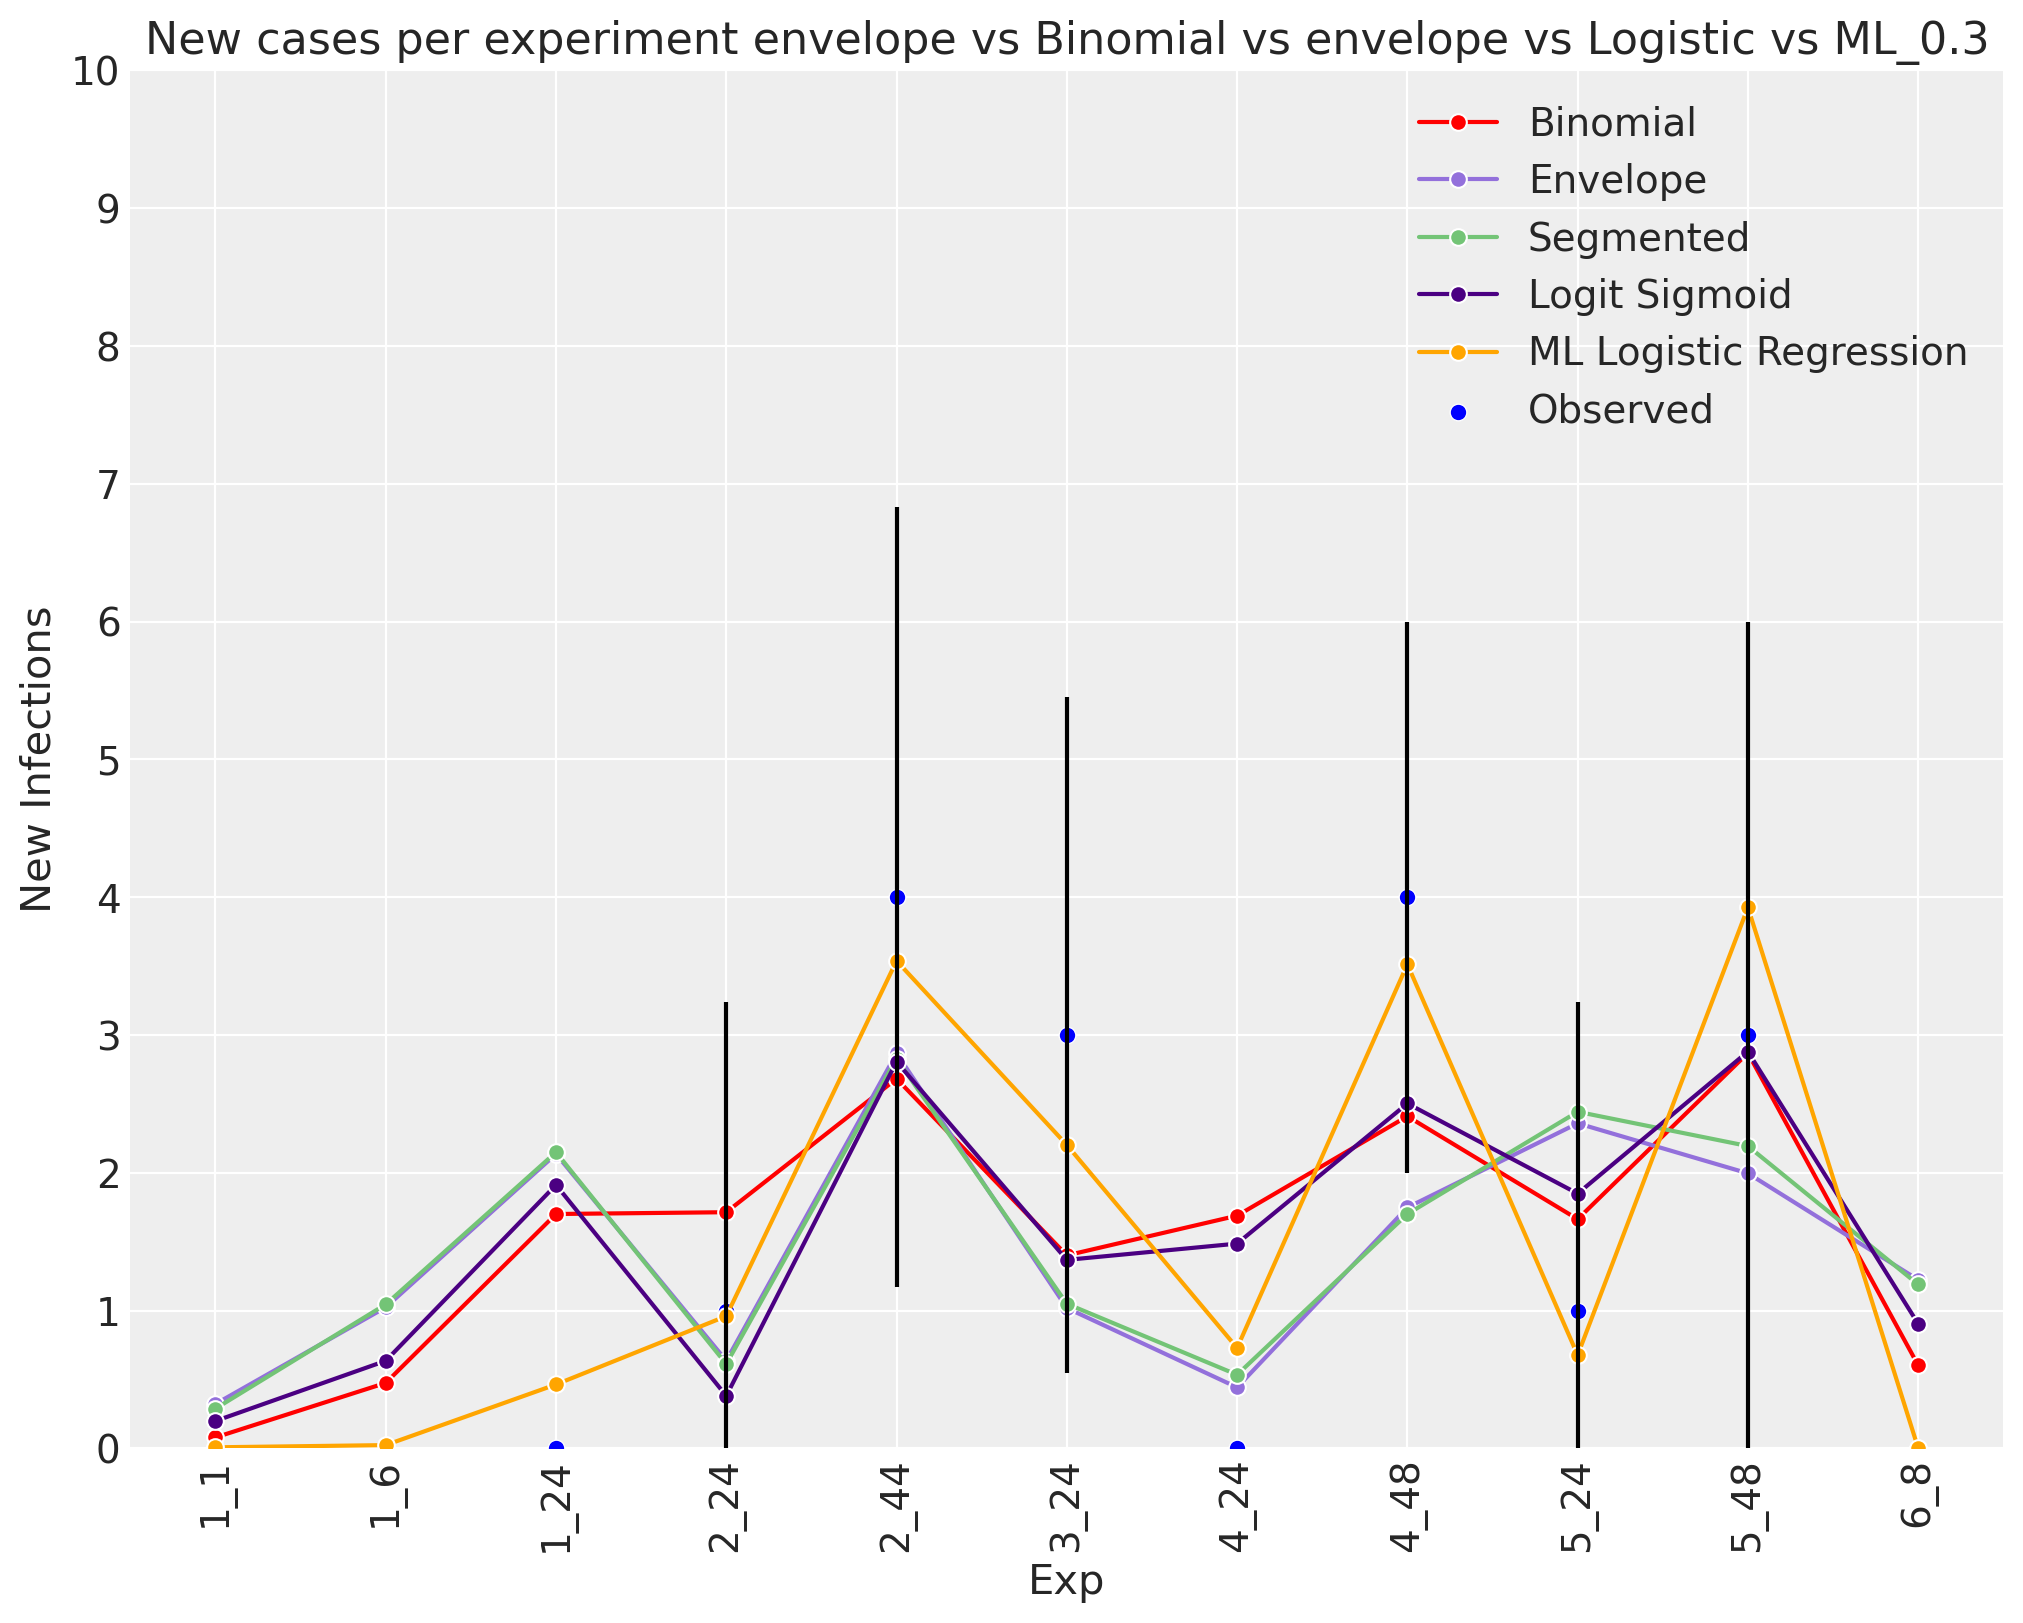

In [36]:
# Plotting the main line and points
plt.figure(figsize=(10, 8))


# plotting results of binomial model in green
sns.lineplot(data=df_bin, x='Exp', y='Mean', color='r', marker= 'o', label='Binomial')

# plotting results of envelope model in red
sns.lineplot(data=df_env, x='Exp', y='Mean', color='mediumpurple', marker= 'o', label='Envelope')


# plotting results of binomial model in green
sns.lineplot(data=df_seg, x='Exp', y='Mean', color=palette_seg[1], marker= 'o', label='Segmented')

# plotting results of binomial model in green
sns.lineplot(data=df_logit, x='Exp', y='Mean', color='indigo', marker= 'o', label='Logit Sigmoid')

sns.lineplot(data=df_ML, x='Exp', y='Mean', color='orange', marker= 'o', label='ML Logistic Regression')


# Adding points and error bars from real observations
sns.scatterplot(data=datacal, x='Exp', y='obs', color='blue', label='Observed')
plt.errorbar(datacal['Exp'], datacal['obs'], yerr=datacal['sd'], fmt='none', ecolor='black')


# Setting labels and title
plt.title("New cases per experiment envelope vs Binomial vs envelope vs Logistic vs ML")
plt.xlabel("Exp")
plt.ylabel("New Infections")

# Setting y-limits and y-ticks
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

# Rotating x-axis labels
plt.xticks(rotation=90)

# Hiding the legend
plt.legend()

plt.show()
